# Lesson 1 - What's your pet

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install -q matplotlib-venn

In [0]:
%reload_ext autoreload 
#모듈을 자동으로 로드
%autoreload 2 
 #매번 모든 모듈을 로드 , autoreload 1 은 %aimport로 가져오는 모듈을 실행
%matplotlib inline 
"""
 notebook에 실행한 브라우저에서 바로 그림을 볼 수 있음 
 *Rich output: 도표와 같은 그림, 소리, 애니메이션과 같은 결과물
 """

'\n notebook에 실행한 브라우저에서 바로 그림을 볼 수 있음 \n *Rich output: 도표와 같은 그림, 소리, 애니메이션과 같은 결과물\n '

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [0]:
!pip install -q matplotlib-venn

In [9]:
help(untar_data) 
# 데이터 파일 압축을 풀고 다운로드한다

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [10]:
path = untar_data(URLs.PETS); path

A new version of the dataset is available.


PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [4]:
path = untar_data(URLs.https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet); path
# 위에 from fastai.vision import * 먼저 런, 링크 주소를 넣는것이 아님...

SyntaxError: ignored

In [11]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

repular expression
: 're' : 같은 타입의 문자열로 작성할 것.   

 원문자열 표기법으로 표현되어야 함....?  

regex object를 먼저 컴파일

Regular expressions can be concatenated(결부시키다) to form new regular expressions; if A and B are both regular expressions, then AB is also a regular expression.


In [13]:
fnames = get_image_files(path_img)
fnames[:8]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_112.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_77.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_193.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_3.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_26.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_63.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
np.random.seed(5) #데이터를 무작위로 섞거나 임의의 수를 발생, seed는 시작 숫자 
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [17]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)
# data bunch: directly use for training a classifier

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
staffordshire_bull_terrier,keeshond,Siamese,leonberger,saint_bernard
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,samoyed,japanese_chin,Persian,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

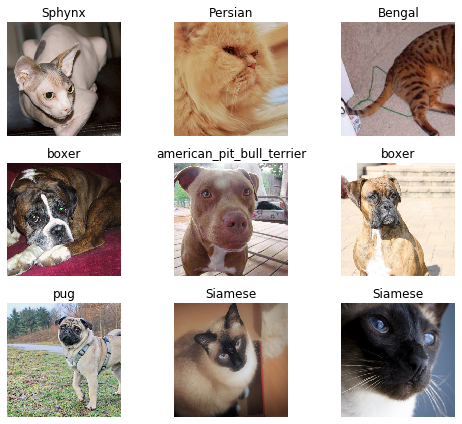

In [13]:
data.show_batch(rows=3, figsize=(7,6))
# the rows argument is the number of rows and columns to display.

In [14]:
print(data.classes)
len(data.classes),data.c
#len()함수: 리스트에 들어있는 요소 전체의 갯수를 돌려주는 함수
# data.c가 무엇을 의미하는지 모르겠습니다. 

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
#  to easily get a model suitable for transfer learning.

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [19]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.880261,0.390314,0.135995,01:39
1,0.737439,0.274759,0.084574,01:39
2,0.450723,0.283439,0.092693,01:39
3,0.358637,0.286216,0.098782,01:40
4,0.300059,0.237126,0.080514,01:43
5,0.231627,0.237761,0.075778,01:42
6,0.198523,0.230975,0.071042,01:41
7,0.173657,0.234510,0.074425,01:41


In [0]:
learn.save('stage-1')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
#from_learner(learn:Learner, ds_type:DatasetType=<DatasetType.Valid: 2>, activ:Module=None, tta=False)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

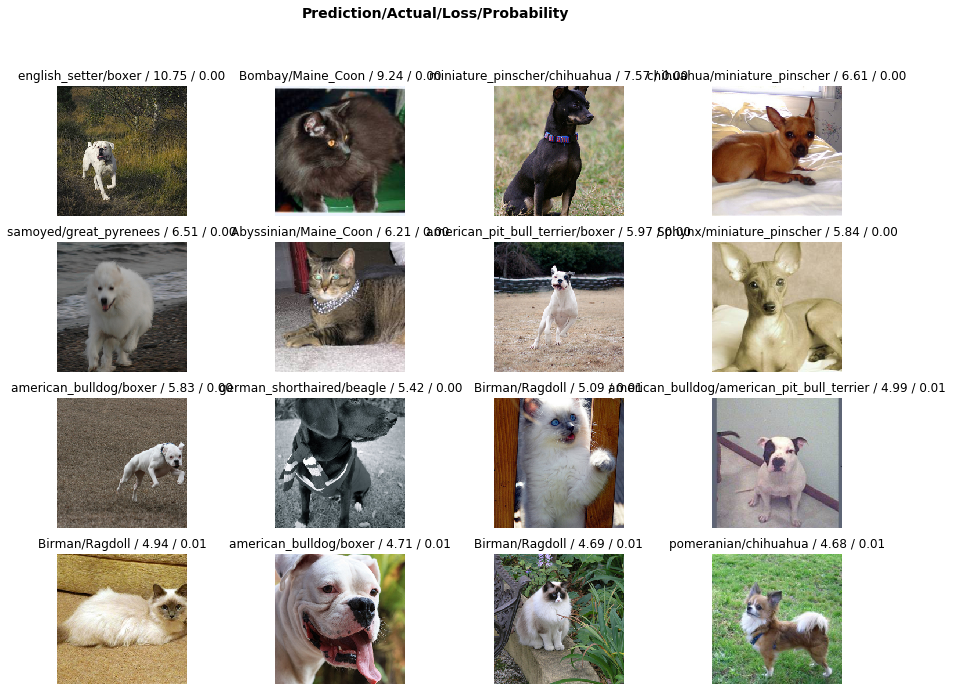

In [23]:
interp.plot_top_losses(16, figsize=(15,11))
#Show images in top_losses along with their prediction, actual, loss, and probability of predicted class in a multilabeled dataset

In [24]:
doc(interp.plot_top_losses)

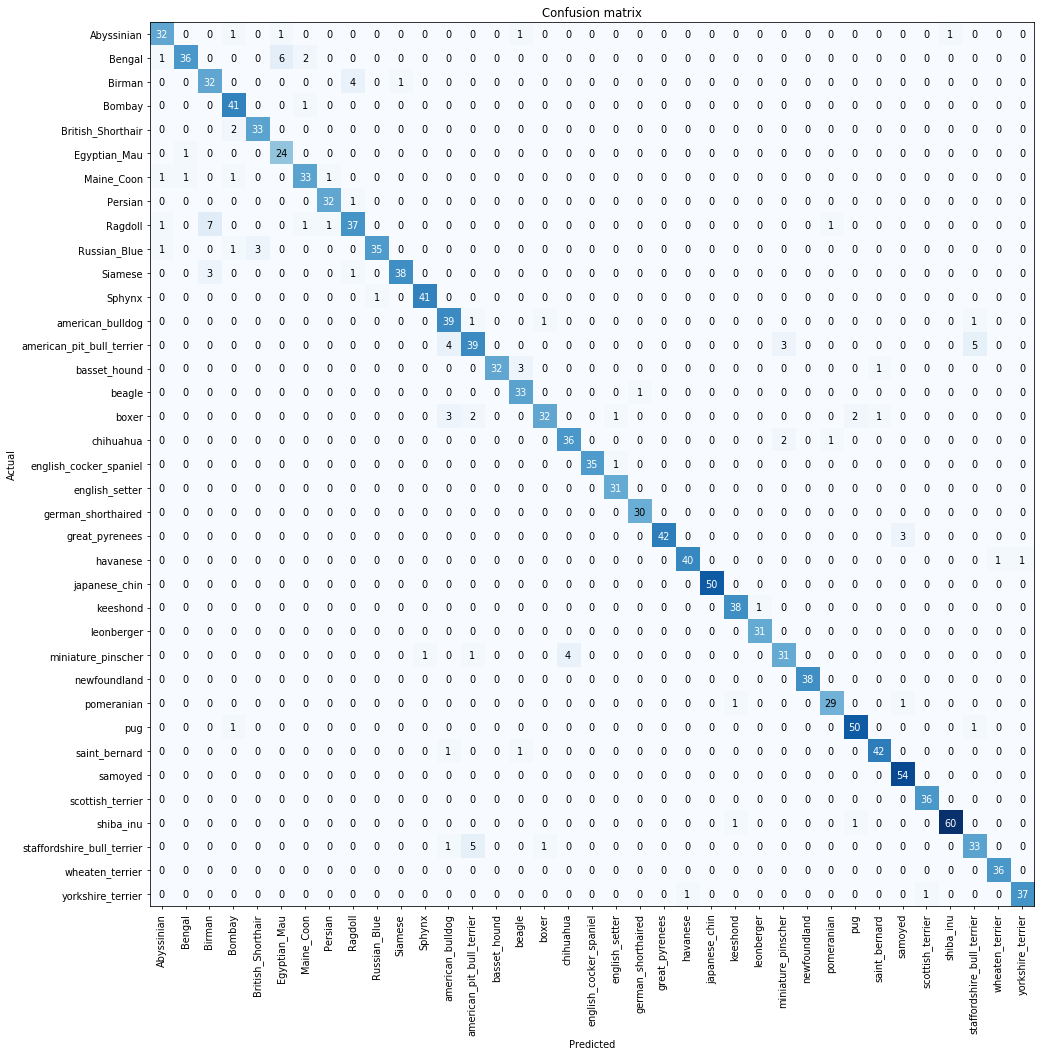

In [25]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=70)

In [26]:
interp.most_confused(min_val=2)
#최솟값은 2

[('Ragdoll', 'Birman', 7),
 ('Bengal', 'Egyptian_Mau', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Birman', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'miniature_pinscher', 3),
 ('basset_hound', 'beagle', 3),
 ('boxer', 'american_bulldog', 3),
 ('great_pyrenees', 'samoyed', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('boxer', 'pug', 2),
 ('chihuahua', 'miniature_pinscher', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.unfreeze()
#It sets every layer group to trainable

In [28]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.212283,0.257104,0.081191,01:27
1,0.299520,0.265254,0.081191,01:26
2,0.255386,0.243453,0.075778,01:26
3,0.211529,0.218554,0.064953,01:26
4,0.177739,0.205308,0.062246,01:25


In [0]:
learn.load('stage-1');
# 다시 'stage 1'에 저장하는 건가요?

In [29]:
learn.lr_find()
#컴퓨터 자체의 결함으로 중간에 멈추게 된 것 같습니다.....

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


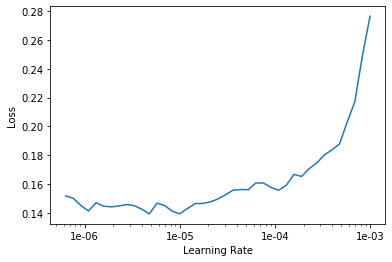

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))
# 1e-4와 1e-5 사이의 값을 원할때는 어떻게 해야 하나요?

epoch,train_loss,valid_loss,error_rate,time
0,0.149778,0.229310,0.072395,01:53
1,0.150891,0.227062,0.072395,01:51


That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [36]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=229)
data.normalize(imagenet_stats)


ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 229, 229),Image (3, 229, 229),Image (3, 229, 229),Image (3, 229, 229),Image (3, 229, 229)
y: CategoryList
staffordshire_bull_terrier,keeshond,Siamese,leonberger,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 229, 229),Image (3, 229, 229),Image (3, 229, 229),Image (3, 229, 229),Image (3, 229, 229)
y: CategoryList
pomeranian,saint_bernard,British_Shorthair,pug,yorkshire_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [37]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
#resnet50으로 다시 트레이닝

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


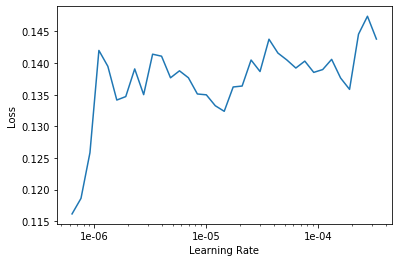

In [33]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.980297,0.279587,0.086604,01:46
1,0.525693,0.297404,0.092693,01:42
2,0.401178,0.220948,0.076455,01:43
3,0.298210,0.233161,0.065629,01:46
4,0.229072,0.203398,0.062246,01:43
5,0.184186,0.188370,0.060217,01:42
6,0.133145,0.186158,0.056834,01:42
7,0.110800,0.180237,0.055480,01:41


In [0]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [41]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-1,1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,5.251637,17.102324,0.962788,01:48
1,4.576735,3.427785,0.854533,01:48
2,3.923737,3.249522,0.740189,01:47


If it doesn't, you can always go back to your previous model.

In [0]:
learn.load('stage-1-50');

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

In [38]:
interp.most_confused(min_val=2)

[('Birman', 'Ragdoll', 6),
 ('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'miniature_pinscher', 3),
 ('basset_hound', 'beagle', 3),
 ('boxer', 'american_pit_bull_terrier', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'pug', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2)]

## Other data formats

In [39]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
# get_transforms are generally pretty good for regular photos - although here we'll add a bit of extra rotation so it's easier to see the differences
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

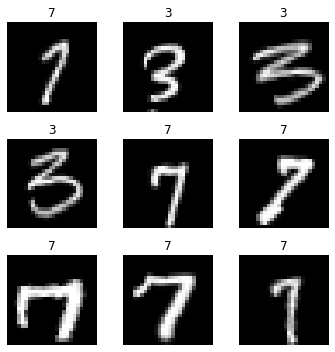

In [41]:
data.show_batch(rows=3, figsize=(5,5))

In [42]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.207167,0.088843,0.969578,00:26
1,0.126986,0.046937,0.982826,00:24
2,0.080381,0.038441,0.987733,00:24
3,0.075007,0.035417,0.989205,00:24


In [43]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=32)

[0, 1]

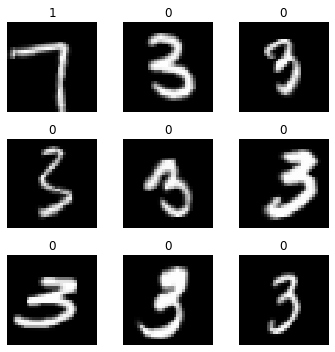

In [45]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [46]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [47]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [48]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [49]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
# lamda 쓰고 버리는 일시적인 함수
data.classes

['3', '7']

In [50]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [51]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']